# Spark uses master slave architecture

# One master & many slaves

# A Cluster is a group of JVMs (nodes) connected by the network, each of which runs Spark, either in Driver or Worker roles.

# Driver is one of the nodes in the Cluster.It plays the role of a master node in the Spark cluster.

# Driver in Spark creates SparkContext,runs on the master node

# Driver talks to cluster manager & negotiates for resources

# Cluster manager launches executors on behalf of the driver

# Executors are JVMs that run on Worker nodes.

# Worker node is basically the slave node. Master node assigns work and worker node actually performs the assigned tasks

# A Job is a sequence of Stages, triggered by an Action such as .count(), foreachRdd(), saveAsTextFile(),collect(), read() or write().

# A Stage is a sequence of Tasks

# The tasks are created by stages; which is the smallest unit in the execution in the Spark applications

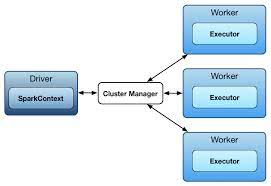

In [4]:
from IPython.display import Image
Image(filename = "architecture1.jpg",width=500,height=500)

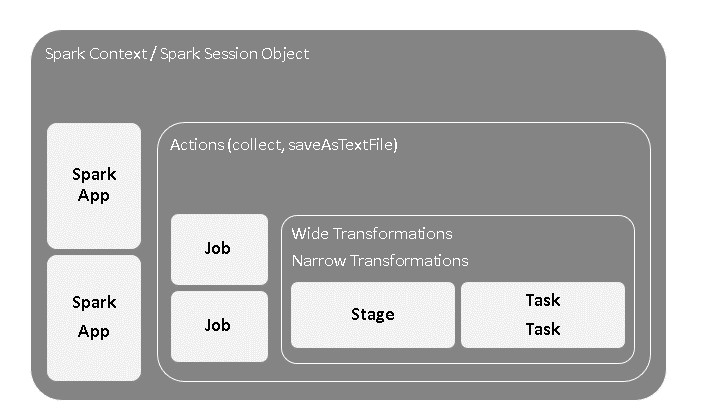

In [12]:
from IPython.display import Image
Image(filename = "architecture2.jpg",width=700,height=700)

In [1]:
# SPARK_HOME path Test
import findspark
findspark.init()
import pyspark
findspark.find()

'C:\\Users\\DBREDDY\\Spark'

In [2]:
import pyspark
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
conf = pyspark.SparkConf().setAppName('Architecture_example').setMaster('local')
sc = pyspark.SparkContext(conf=conf)
spark = SparkSession(sc)

In [16]:
print(dir(sc))

['PACKAGE_EXTENSIONS', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattribute__', '__getnewargs__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_accumulatorServer', '_active_spark_context', '_assert_on_driver', '_batchSize', '_callsite', '_checkpointFile', '_conf', '_dictToJavaMap', '_do_init', '_encryption_enabled', '_ensure_initialized', '_gateway', '_getJavaStorageLevel', '_initialize_context', '_javaAccumulator', '_jsc', '_jvm', '_lock', '_next_accum_id', '_pickled_broadcast_vars', '_python_includes', '_repr_html_', '_serialize_to_jvm', '_temp_dir', '_unbatched_serializer', 'accumulator', 'addFile', 'addPyFile', 'appName', 'applicationId', 'binaryFiles', 'binaryRecords', 'broadcast', 'cancelAllJobs', 'cancelJobGroup', '

In [17]:
sc.uiWebUrl

'http://DBREDDY-PC:4040'

In [3]:
counts = sc.textFile("example.txt")\
            .flatMap(lambda line: line.split(" "))\
            .map(lambda word: (word, 1))\
            .reduceByKey(lambda a, b: a + b)

counts.saveAsTextFile(r"C:\Users\DBREDDY\Desktop\result")

In [4]:
#When the stop method of sparkcontext is called, it terminates all executors
spark.stop()

# Jobs(No of actions in spark code) --> Stages --> Tasks

# Each spark application can have N number of jobs

# The number of Spark jobs is equal to the number of actions in the application and each Spark job should have at least one Stage

# DAG --> Directed Acyclic Graph 